In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import os

sys.path.append("src")
from desica import Desica
from desica import plot_time_to_mortality, plot_swp_sw
from generate_met_data import generate_met_data
from canopy import Canopy, FarquharC3
from math import isclose
from calc_pet import calc_net_radiation, calc_pet_energy, calc_fao_pet
import constants as c


In [2]:
# Generate some met data ... 
time_step = 30

lat = -35.76
lon = 148.0
met = generate_met_data(Tmin=10, Tmax=30.0, RH=30, ndays=700,
                        lat=lat, lon=lon, time_step=time_step)

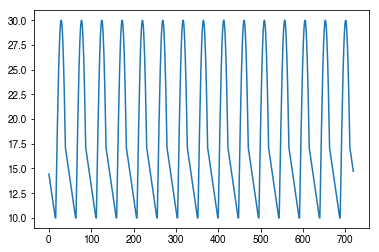

In [3]:
plt.plot(met.tair[0:720])

In [4]:
# Set the model params

b = 6          # SW retention curve param
kp_sat = 4     # Tim Brodribb pers comm
psi_stem0 = 0. # initial stem water potential, MPa
AL = 6.        # plant leaf area, m2
p50 = -4.      # xylem pressure inducing 50% loss of hydraulic conductivity
               # due to embolism, MPa
psi_f = -3.    # reference potential for Tuzet model, MPa
gmin = 10.     # minimum stomatal conductance, mmol m-2 s-1
Cl = 10000.    # leaf capacitance, mmol MPa-1 (total plant)
Cs = 120000.   # stem capacitance, mmol MPa-1
g1 = 4.0       # sensitivity of stomatal conductance to the assimilation
               # rate, kPa
g0 = 0.0
theta_J = 0.85
Rd25 = 0.92
Q10 = 1.92
Vcmax25 = 50.0
Jmax25 = 100.
Eav = 58550.0
deltaSv = 629.26
Eaj = 29680.
deltaSj = 631.88
FAO = False
year = 2000

# Examine how time to death changes as gmin is increased?
do_sensitivity = False

In [5]:
F = Canopy(g1=g1, g0=g0, theta_J=theta_J, Rd25=Rd25, Q10=Q10,
           Vcmax25=Vcmax25, Jmax25=Jmax25, Eav=Eav, deltaSv=deltaSv,
           Eaj=Eaj, deltaSj=deltaSj)
D = Desica(psi_stem0=psi_stem0, AL=AL, p50=p50, psi_f=psi_f, gmin=gmin,
           Cl=Cl, Cs=Cs, F=F, g1=g1, run_twice=True, stop_dead=True,
           FAO=FAO, kp_sat=kp_sat, b=b)

In [6]:
(out, day_of_death) = D.run_simulation(met)

In [7]:
day_of_death

98.70833333333333

In [8]:
print(out)

         year  doy   hod     Eleaf  psi_leaf  psi_stem  psi_soil        sw  \
0      2000.0  0.0   0.0  0.000000 -0.027139 -0.072569 -0.000800  0.500000   
1      2000.0  0.0   1.0  0.112203 -0.065051 -0.041449 -0.000800  0.499953   
2      2000.0  0.0   2.0  0.110072 -0.047604 -0.028590 -0.000801  0.499924   
3      2000.0  0.0   3.0  0.107977 -0.037949 -0.021741 -0.000801  0.499904   
4      2000.0  0.0   4.0  0.105917 -0.032639 -0.018025 -0.000801  0.499889   
5      2000.0  0.0   5.0  0.103892 -0.029615 -0.015955 -0.000801  0.499876   
6      2000.0  0.0   6.0  0.101901 -0.027795 -0.014752 -0.000801  0.499865   
7      2000.0  0.0   7.0  0.099944 -0.026612 -0.014005 -0.000801  0.499854   
8      2000.0  0.0   8.0  0.098019 -0.025766 -0.013499 -0.000802  0.499844   
9      2000.0  0.0   9.0  0.096128 -0.025101 -0.013122 -0.000802  0.499834   
10     2000.0  0.0  10.0  0.094268 -0.024535 -0.012815 -0.000802  0.499824   
11     2000.0  0.0  11.0  0.092441 -0.024024 -0.012546 -0.000802

In [9]:
odir = "plots"
if not os.path.exists(odir):
    os.makedirs(odir)

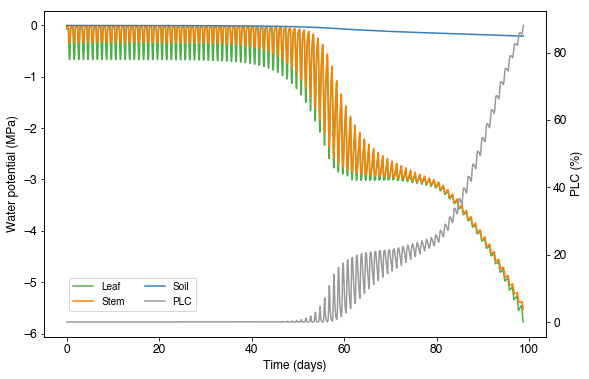

In [10]:
plot_time_to_mortality(odir, out, time_step, to_screen=True)

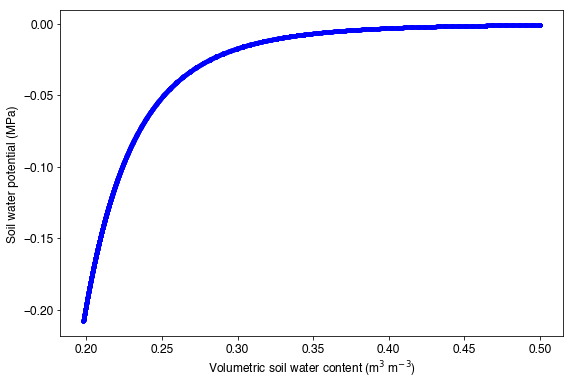

In [11]:
plot_swp_sw(odir, out, to_screen=True)